In [4]:
%matplotlib inline

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nose.tools import *

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
# Write your imports here

In [22]:
np.random.seed(1234)

**Read the data**

In [7]:
birds_data = pd.read_csv("data/bird.csv", dtype={"id": "str"})

# Data cleanup

## First we fill any missing values with average for the eko type

In [8]:
birds_data[birds_data.isnull().any(axis=1)]

,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
160,160,76.43,4.11,86.79,3.84,NaN,NaN,67.13,2.48,41.65,2.10,W
204,204,63.76,4.74,NaN,NaN,57.33,4.88,75.67,4.33,60.19,3.82,R
207,207,98.08,7.77,113.04,5.76,82.04,7.17,107.47,6.65,NaN,NaN,R
342,342,NaN,NaN,NaN,NaN,32.54,2.65,55.06,2.81,38.94,2.25,SO
378,378,20.10,1.86,NaN,1.52,17.21,1.22,NaN,NaN,18.46,0.91,SO
396,396,16.51,1.47,20.56,1.43,15.88,1.27,NaN,1.19,17.63,1.02,SO
404,404,20.36,1.87,22.19,1.60,NaN,1.77,37.47,1.64,25.54,1.34,SO


### Cleanup of Singing birds ( SO )

In [9]:
# humerus Length ( huml)
meanSO = np.mean(birds_data[birds_data.type == "SO"].huml)
huml = birds_data[birds_data.type == "SO"].huml.fillna(meanSO)
birds_data.loc[birds_data.type == "SO", "huml"] = huml
print("Average SO (Singing Bird) Humerus Length:", meanSO)

# humerus Width ( humw)
meanSO = np.mean(birds_data[birds_data.type == "SO"].humw)
humw = birds_data[birds_data.type == "SO"].humw.fillna(meanSO)
birds_data.loc[birds_data.type == "SO", "humw"] = humw
print("Average SO (Singing Bird) Humerus Width:", meanSO)


# ulna length (ulnal)
meanSO = np.mean(birds_data[birds_data.type == "SO"].ulnal)
ulnal = birds_data[birds_data.type == "SO"].ulnal.fillna(meanSO)
birds_data.loc[birds_data.type == "SO", "ulnal"] = ulnal
print("Average SO (Singing Bird) Ulna Length:",meanSO)

# ulna Width ( ulnaw)
meanSO = np.mean(birds_data[birds_data.type == "SO"].ulnaw)
ulnaw = birds_data[birds_data.type == "SO"].ulnaw.fillna(meanSO)
birds_data.loc[birds_data.type == "SO", "ulnaw"] = ulnaw
print("Average SO (Singing Bird) Ulna Width:", meanSO)

# femur length (feml)
meanSO = np.mean(birds_data[birds_data.type == "SO"].feml)
feml = birds_data[birds_data.type == "SO"].feml.fillna(meanSO)
birds_data.loc[birds_data.type == "SO", "feml"] = feml
print("Average SO (Singing Bird) Femur Length:",meanSO)

# tibiotarsus length (tibl)
meanSO = np.mean(birds_data[birds_data.type == "SO"].tibl)
tibl = birds_data[birds_data.type == "SO"].tibl.fillna(meanSO)
birds_data.loc[birds_data.type == "SO", "tibl"] = tibl
print("Average SO (Singing Bird) Tibiotarsus Length:",meanSO)

# tibiotarsus Width (tibw)
meanSO = np.mean(birds_data[birds_data.type == "SO"].tibw)
tibw = birds_data[birds_data.type == "SO"].tibw.fillna(meanSO)
birds_data.loc[birds_data.type == "SO", "tibw"] = tibw
print("Average SO (Singing Bird) Tibiotarsus Width:", meanSO)

birds_data[birds_data.isnull().any(axis=1)]

Average SO (Singing Bird) Humerus Length: 22.361102362204733
Average SO (Singing Bird) Humerus Width: 2.029763779527559
Average SO (Singing Bird) Ulna Length: 26.39809523809524
Average SO (Singing Bird) Ulna Width: 1.7438582677165362
Average SO (Singing Bird) Femur Length: 21.38346456692914
Average SO (Singing Bird) Tibiotarsus Length: 36.32603174603177
Average SO (Singing Bird) Tibiotarsus Width: 1.5487401574803144


,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
160,160,76.43,4.11,86.79,3.84,NaN,NaN,67.13,2.48,41.65,2.10,W
204,204,63.76,4.74,NaN,NaN,57.33,4.88,75.67,4.33,60.19,3.82,R
207,207,98.08,7.77,113.04,5.76,82.04,7.17,107.47,6.65,NaN,NaN,R


### Cleanup of Raptors ( R )

In [10]:
# ulna length (ulnal)
meanSO = np.mean(birds_data[birds_data.type == "R"].ulnal)
ulnal = birds_data[birds_data.type == "R"].ulnal.fillna(meanSO)
birds_data.loc[birds_data.type == "R", "ulnal"] = ulnal
print("Average R (Raptors) Ulna Length:",meanSO)

# ulna Width ( ulnaw)
meanSO = np.mean(birds_data[birds_data.type == "R"].ulnaw)
ulnaw = birds_data[birds_data.type == "R"].ulnaw.fillna(meanSO)
birds_data.loc[birds_data.type == "R", "ulnaw"] = ulnaw
print("Average R (Raptors) Ulna Width:", meanSO)

# tarsometatarsus length (tarl)
meanSO = np.mean(birds_data[birds_data.type == "R"].tarl)
tarl = birds_data[birds_data.type == "R"].tarl.fillna(meanSO)
birds_data.loc[birds_data.type == "R", "tarl"] = tarl
print("Average R (Raptors) Tarsometatarsus Length:",meanSO)

# tarsometatarsus Width ( tarw)
meanSO = np.mean(birds_data[birds_data.type == "R"].tarw)
tarw = birds_data[birds_data.type == "R"].tarw.fillna(meanSO)
birds_data.loc[birds_data.type == "R", "tarw"] = tarw
print("Average R (Raptors) Tarsometatarsus Width:", meanSO)

birds_data[birds_data.isnull().any(axis=1)]

Average R (Raptors) Ulna Length: 100.34244897959184
Average R (Raptors) Ulna Width: 4.813265306122449
Average R (Raptors) Tarsometatarsus Length: 59.16632653061227
Average R (Raptors) Tarsometatarsus Width: 5.073877551020407


,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type
160,160,76.43,4.11,86.79,3.84,NaN,NaN,67.13,2.48,41.65,2.1,W


### Cleanup of Wading Birds ( W )

In [11]:
# femur length (feml)
meanSO = np.mean(birds_data[birds_data.type == "W"].feml)
feml = birds_data[birds_data.type == "W"].feml.fillna(meanSO)
birds_data.loc[birds_data.type == "W", "feml"] = feml
print("Average W (Wading Birds) Femur Length:",meanSO)

# femur width (femw)
meanSO = np.mean(birds_data[birds_data.type == "W"].femw)
femw = birds_data[birds_data.type == "W"].femw.fillna(meanSO)
birds_data.loc[birds_data.type == "W", "femw"] = femw
print("Average W (Wading Birds) Femur Width:",meanSO)

birds_data[birds_data.isnull().any(axis=1)]

Average W (Wading Birds) Femur Length: 40.11953125000002
Average W (Wading Birds) Femur Width: 3.1185937499999996


,id,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw,type


In [12]:
birds_data.describe()

,huml,humw,ulnal,ulnaw,feml,femw,tibl,tibw,tarl,tarw
count,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000,420.000000
mean,64.549812,4.364999,68.986306,3.595731,36.843269,3.220640,64.527886,3.178449,39.277444,2.935128
std,53.809849,2.853495,58.667950,2.184208,19.946310,2.021171,37.798224,2.079871,23.177055,2.185568
min,9.850000,1.140000,14.090000,1.000000,11.830000,0.930000,5.500000,0.870000,7.770000,0.660000
25%,25.035000,2.187500,28.005000,1.867500,21.332500,1.717500,36.344008,1.560000,23.042500,1.427500
50%,44.075000,3.495000,43.505000,2.945000,31.130000,2.525000,51.940000,2.490000,31.810000,2.235000
75%,90.220000,5.805000,97.557500,4.772500,47.100000,4.122500,82.870000,4.252500,50.462500,3.522500
max,420.000000,17.840000,422.000000,12.000000,117.070000,11.640000,240.000000,11.030000,175.000000,14.090000


Check the number of specimens in each ecological group.

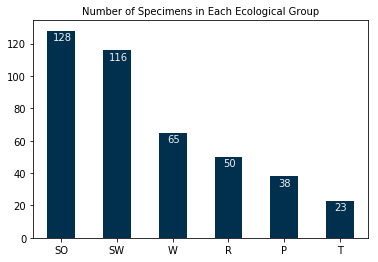

In [13]:
size_of_each_group = birds_data.groupby("type").size().sort_values(ascending=False)

ax = size_of_each_group.plot(
    kind="bar", 
    color="#00304e",
    figsize=((6, 4)),
    rot=0
)

ax.set_title("Number of Specimens in Each Ecological Group", fontsize=10)
ax.set_xlabel("")

for x, y in zip(np.arange(0, len(size_of_each_group)), size_of_each_group):
    ax.annotate("{:d}".format(y), xy=(x-(0.14 if len(str(y)) == 3 else 0.1), y-6), fontsize=10, color="#eeeeee")

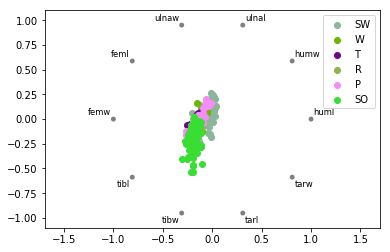

In [14]:
birds_data = birds_data.drop('id', axis=1)
pd.plotting.radviz(birds_data, 'type')

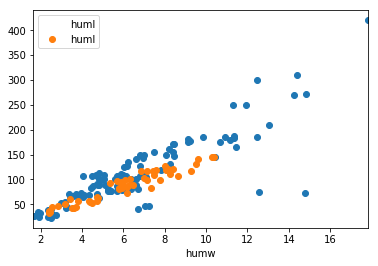

In [62]:
ax = plt.gca()

birds_data[birds_data.type == "SW"].plot(style=['o'], x="humw", y="huml", ax=ax)
birds_data[birds_data.type == "R"].plot(style=['o'], x="humw", y="huml", ax=ax)

plt.show()